## **Marketing - Dados Pago**

Análise de dados do 4º Trimestre de 2024 (01/10/24 - 10/12/24).

### **Importação dos dados**

In [1]:
import pandas as pd

data = pd.read_csv("mkt-pago.csv")
data.head()

,data,visitantes_site,contatos,mqls_diario,mqls_rejeitados,mqls_qualificados,sql,sal,vendas,receita,receita-media-venda,MQL -> SQL
0,01/10/2024,2.248,77,30,14,16,10,6,2,"R$ 264,00","R$ 132,00","62,50%"
1,02/10/2024,2.392,105,39,9,30,5,0,2,"R$ 594,00","R$ 297,00","16,67%"
2,03/10/2024,2.315,98,40,12,28,4,7,3,"R$ 471,00","R$ 157,00","14,29%"
3,04/10/2024,2.086,80,29,12,17,10,2,0,"R$ 0,00","R$ 0,00","58,82%"
4,05/10/2024,1.025,79,20,0,20,0,0,0,"R$ 0,00","R$ 0,00","0,00%"


In [2]:
data = data.rename(columns={"MQL -> SQL": "mql_sql"})

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   data                 70 non-null     object 
 1   visitantes_site      70 non-null     float64
 2   contatos             70 non-null     int64  
 3   mqls_diario          70 non-null     int64  
 4   mqls_rejeitados      70 non-null     int64  
 5   mqls_qualificados    70 non-null     int64  
 6   sql                  70 non-null     int64  
 7   sal                  70 non-null     int64  
 8   vendas               70 non-null     int64  
 9   receita              70 non-null     object 
 10  receita-media-venda  70 non-null     object 
 11  mql_sql              70 non-null     object 
dtypes: float64(1), int64(7), object(4)
memory usage: 6.7+ KB


In [4]:
data.tail()

,data,visitantes_site,contatos,mqls_diario,mqls_rejeitados,mqls_qualificados,sql,sal,vendas,receita,receita-media-venda,mql_sql
65,05/12/2024,1.736,57,27,9,18,6,5,2,"R$ 287,00","R$ 143,50","33,33%"
66,06/12/2024,1.541,56,18,7,11,6,4,3,"R$ 452,00","R$ 150,67","54,55%"
67,07/12/2024,530.000,53,17,0,17,0,0,0,"R$ 0,00","R$ 0,00","0,00%"
68,08/12/2024,286.000,42,8,0,8,0,0,0,"R$ 0,00","R$ 0,00","0,00%"
69,09/12/2024,1.921,59,22,9,13,9,1,5,"R$ 1.794,68","R$ 358,94","69,23%"


In [5]:
data.describe()

,visitantes_site,contatos,mqls_diario,mqls_rejeitados,mqls_qualificados,sql,sal,vendas
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,107.984771,64.242857,24.614286,6.885714,17.728571,4.500000,3.057143,2.157143
std,260.704413,18.683819,7.929568,6.398693,6.505118,3.843873,2.786540,2.356832
min,1.000000,24.000000,8.000000,0.000000,-2.000000,0.000000,0.000000,0.000000
25%,1.724000,50.000000,19.000000,0.000000,14.250000,0.000000,0.000000,0.000000
50%,2.194000,65.000000,24.000000,6.500000,17.000000,5.000000,3.000000,2.000000
75%,3.363250,78.000000,30.750000,11.750000,22.750000,7.000000,5.000000,3.000000
max,957.000000,105.000000,43.000000,33.000000,32.000000,15.000000,9.000000,11.000000


### **Tratamento e Limpeza dos dados**

In [6]:
data["data"] = pd.to_datetime(data["data"], dayfirst=True) # Formatação para datetime

In [7]:
# Limpeza e conversão - Receita
data["receita"] = data["receita"].str.replace("R\$", "", regex=True) # Remove R$ e espaços em branco
data["receita"] = data["receita"].str.replace(".", "", regex=False)  # Remove pontos de milhares
data["receita"] = data["receita"].str.replace(",", ".", regex=False)  # Substitui vírgula por ponto
data["receita"] = pd.to_numeric(data["receita"], errors="coerce") # Converte e detecta valores inválidos

In [8]:
# Limpeza e conversão - Ticket Médio
data["receita-media-venda"] = data["receita-media-venda"].str.replace("R\$", "", regex=True) # Remove R$ e espaços em branco
data["receita-media-venda"] = data["receita-media-venda"].str.replace(".", "", regex=False)  # Remove pontos de milhares
data["receita-media-venda"] = data["receita-media-venda"].str.replace(",", ".", regex=False)  # Substitui vírgula por ponto
data["receita-media-venda"] = pd.to_numeric(data["receita-media-venda"], errors="coerce") # Converte e detecta valores inválidos

In [9]:
data.head()

,data,visitantes_site,contatos,mqls_diario,mqls_rejeitados,mqls_qualificados,sql,sal,vendas,receita,receita-media-venda,mql_sql
0,2024-10-01,2.248,77,30,14,16,10,6,2,264.0,132.0,"62,50%"
1,2024-10-02,2.392,105,39,9,30,5,0,2,594.0,297.0,"16,67%"
2,2024-10-03,2.315,98,40,12,28,4,7,3,471.0,157.0,"14,29%"
3,2024-10-04,2.086,80,29,12,17,10,2,0,0.0,0.0,"58,82%"
4,2024-10-05,1.025,79,20,0,20,0,0,0,0.0,0.0,"0,00%"


In [10]:
# Limpeza dos dados
data["mql_sql"] = data["mql_sql"].str.strip()  # Remove espaços
data["mql_sql"] = data["mql_sql"].str.replace("%", "", regex=False)  # Remove símbolo de porcentagem
data["mql_sql"] = data["mql_sql"].str.replace("[^0-9.,]", "", regex=True)  # Remove caracteres inválidos
data["mql_sql"] = data["mql_sql"].str.replace(",", ".")  # Substitui vírgula por ponto

# Converte para numérico
data["mql_sql"] = pd.to_numeric(data["mql_sql"], errors="coerce")

# Transforma em decimal
data["mql_sql"] = data["mql_sql"] / 100

In [11]:
data.head(5)

,data,visitantes_site,contatos,mqls_diario,mqls_rejeitados,mqls_qualificados,sql,sal,vendas,receita,receita-media-venda,mql_sql
0,2024-10-01,2.248,77,30,14,16,10,6,2,264.0,132.0,0.6250
1,2024-10-02,2.392,105,39,9,30,5,0,2,594.0,297.0,0.1667
2,2024-10-03,2.315,98,40,12,28,4,7,3,471.0,157.0,0.1429
3,2024-10-04,2.086,80,29,12,17,10,2,0,0.0,0.0,0.5882
4,2024-10-05,1.025,79,20,0,20,0,0,0,0.0,0.0,0.0000


In [12]:
data["receita"].sum()

np.float64(40762.29)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   data                 70 non-null     datetime64[ns]
 1   visitantes_site      70 non-null     float64       
 2   contatos             70 non-null     int64         
 3   mqls_diario          70 non-null     int64         
 4   mqls_rejeitados      70 non-null     int64         
 5   mqls_qualificados    70 non-null     int64         
 6   sql                  70 non-null     int64         
 7   sal                  70 non-null     int64         
 8   vendas               70 non-null     int64         
 9   receita              70 non-null     float64       
 10  receita-media-venda  70 non-null     float64       
 11  mql_sql              70 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(7)
memory usage: 6.7 KB


# **Análises**

## **Correlações entre Variáveis** 

Abaixo são compartilhados dois gráficos de relações entre as seguintes variáveis:

- Relação entre MQLs qualificados e SQLS;
- Relação entre MQLs qualificados e Vendas.

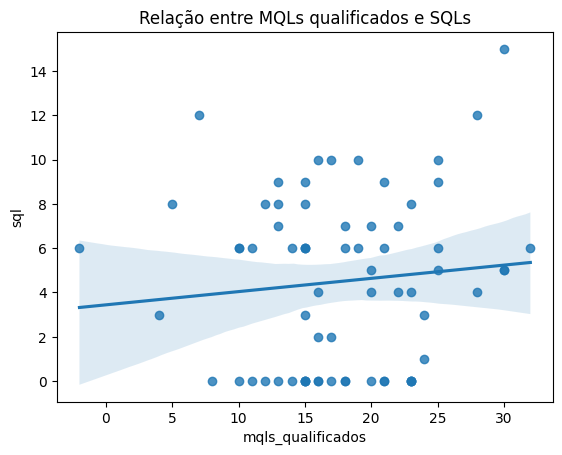

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Relação entre MQLs qualificados e SQLs
sns.regplot(x="mqls_qualificados", y="sql", data=data)
plt.title("Relação entre MQLs qualificados e SQLs")
plt.show()

### **1. Relação entre MQLs qualificados e SQLs**

- **Linha azul reta:** Mostra a tendência da relação entre MQLs qualificados e SQLs. Aqui, há uma leve inclinação positiva na linha, indicando que, em geral, um aumento nos MQLs qualificados tende a acompanhar um aumento no número de SQLs. Outro ponto são SQLs gerados com nenhum MQL, esses SQLs podem ser leads qualificados de dias anteriores que avançaram no funil para SQL em um momento posterior. 

- **Pontos fora do fundo azul:** Indicam obsevações que não seguem o padrão esperado pelo modelo linear. Isso sugere variações nos dados que o modelo linear não captura bem.

- **Fundo azul (intervalo de confiança):** Assim como no primeiro gráfico, representa a incerteza do modelo. Neste caso, o intervalo é relativamente estreito, indicando maior confiança na relação linear.

### **Interpretação:**

- Há uma correlação fraca, mas positiva, entre MQLs qualificados e SQLs. Ou seja, mais MQLs qualificados geralmente levam a um leve aumento nos SQLs, mas a relação não é muito forte ou garantida.

### **2. Relação entre MQLs qualificados e Vendas**

- **Linha azul reta:** Neste caso, a linha é quase horizontal, sugerindo que não há uma correlação forte entre o número de MQLs qualificados e o aumento de receita.
- **Pontos fora do fundo azul (região sombreada):** Esses pontos indicam observações que estão fora da área de confiança do modelo linear. Eles podem ser considerados "outliers" no contexto do ajuste, ou seja, valores que se desviam da tendência média.

- **Fundo azul (intervalo de confiança):** Representa o intervalo de confiança para o modelo linear. Quanto mais largo o fundo azul, maior a incerteza no ajuste do modelo para os dados.

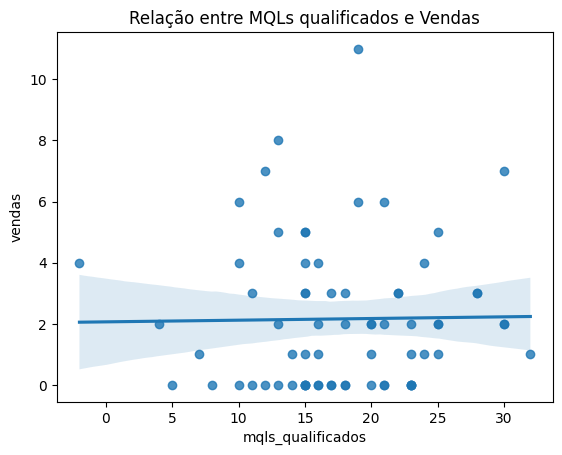

In [15]:
# Relação entre MQLs qualificados e Vendas
sns.regplot(x="mqls_qualificados", y="vendas", data=data)
plt.title("Relação entre MQLs qualificados e Vendas")
plt.show()

### **3. Correlação entre as Variáveis**

A correlação mede a força e a direção de uma relação linear entre duas variáveis. Os valores variam entre ```-1 e 1:```

**1:** Correlação perfeitamente positiva (as duas variáveis crescem juntas de forma linear).

**0:** Nenhuma correlação linear (as variáveis não têm relação linear significativa).

**-1:** Correlação perfeitamente negativa (uma cresce enquanto a outra diminui de forma linear).

In [16]:
# Correlação 
correlacao = data[["mqls_qualificados", "sql", "vendas"]].corr()
print(correlacao)

                   mqls_qualificados       sql    vendas
mqls_qualificados           1.000000  0.101140  0.015111
sql                         0.101140  1.000000  0.549515
vendas                      0.015111  0.549515  1.000000


### **4. Interpretação dos Resultados:**

#### a. Correlação entre **mqls_qualificados, SQL e Vendas**:

```mqls_qualificados``` e ```sql:``` 

Correlação = 0.101.

- Correlação muito baixa. Indica que não há nenhuma relação linear forte entre MQLs qualificados e SQLs. O aumento ou diminuição de  MQLs qualificados não afeta diretamente os SQLs.

```mqls_qualificados``` e ```vendas:``` 

Correlação = 0.015.

- Correlação quase inexistente. Isso sugere que o número de MQLs qualificados tem pouca ou nenhuma influência direta nas vendas.


#### b. Correlação entre **SQL e Vendas**:

```sql``` e ```vendas:```

Correlação = 0.550.

- Moderada. Isso indica que SQLs têm alguma relação com vendas: quanto mais SQLs são gerados, maior tende a ser o número de vendas (mas não é uma relação muito forte). 
- O processo de conversão de SQL para vendas está funcionando relativamente bem, mas pode ser otimizado. Por exemplo: melhorar o engajamento com SQLs ou revisar as abordagens da equipe de vendas.

### **Conclusão** 

**O aumento de MQLs qualificados está diretamente relacionado ao aumento de SQLs e vendas, ou há um limite de saturação?**

Com base na análise dos dados e gráficos, podemos observar que o aumento de MQLs qualificados não está diretamente relacionado ao aumento proporcional de SQLs e vendas. 

A correlação entre MQLs qualificados e vendas foi muito baixa, indicando que simplesmente aumentar a quantidade de MQLs não garante um aumento automático nas vendas.

- **MQLs qualificados e Vendas:** Não há uma relação clara e forte entre o número de MQLs qualificados e a receita gerada. Fatores externos (como qualidade do MQL ou ticket médio) podem estar influenciando mais a receita.

- **MQLs qualificados e SQLs:** Há uma relação positiva, mas fraca, indicando que aumentar os MQLs qualificados podee ajudar a gerar mais SQLs, mas não é uma relação diretamente proporcional ou garantida.

Essas análises indicam que, além de focar na quantidade de MQLs qualificados, é fundamental investigar a qualidade desses leads e otimizar as etapas subsequentes do funil. Mais MQLs não significa, necessariamente, maior faturamento, assim como um menor volume de leads não implica, obrigatoriamente, em queda de receita. 

O impacto no faturamento é relativo e depende de diversos fatores, como a qualidade dos leads gerados, a eficiência da equipe de vendas e o alinhamento entre as equipes de marketing e vendas para garantir que os leads sejam bem trabalhados em cada etapa do funil.

# **Análise de Receita**

In [17]:
# !pip install scipy

In [18]:
from scipy.stats import pearsonr

# Cálculo do coeficiente de correlação de Pearson entre MQLs e Receita
correlacao, p_valor = pearsonr(data["mqls_qualificados"], data["receita"])

print(f"Coeficiente de Correlação de Pearson: {correlacao}")
print(f"Valor p: {p_valor}")

Coeficiente de Correlação de Pearson: -0.04067739609057983
Valor p: 0.7381214724398705


**1. Coeficiente de correlação de Pearson (-0.0407):**
- O valor é muito próximo de 0, o que indica uma correlação muito fraca ou próxima de inexistente entre os **MQLs** e a **receita**.

**2. Valor p (p=0.7381):**
- O valor p é muito maior que 0.05, significa que a correlação observada entre MQLs e receita não é estatisticamente significativa.

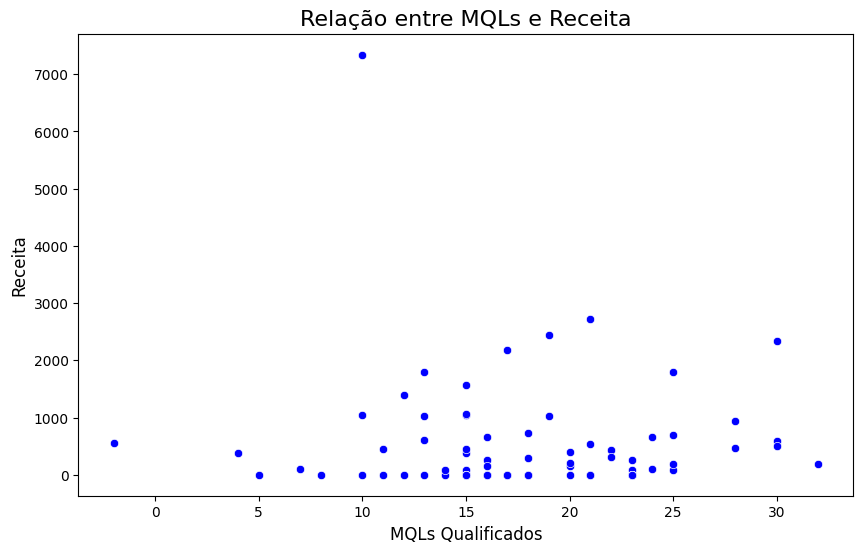

In [19]:
# Gráfico de dispersão
plt.figure(figsize=(10,6))
sns.scatterplot(data=data, x="mqls_qualificados", y="receita", color="blue")

# Adicionar título e rótulos aos eixos
plt.title("Relação entre MQLs e Receita", fontsize=16)
plt.xlabel("MQLs Qualificados", fontsize=12)
plt.ylabel("Receita", fontsize=12)

plt.show()

**Há correlação entre dias de maior receita e dias de maior volume de leads qualificados (MQLs)?**

- A correlação entre MQLs e receita é fraca ou inexistente.
- Gerar mais MQLs qualificados não necessariamente resulta em aumento de receita.